In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

### Аналитическое решение

In [5]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [6]:
y_pred_analytical = X @ W_analytical

In [7]:
calc_mse(y, y_pred_analytical)

43.96875000000001

### Градиентный спуск

Подберите скорость обучения (eta) и количество итераций

In [8]:
### Убрала уменьшение скорости обучения на каждом десятом шаге, поменяла eta на 3e-2, количество итераций на 300

n = X.shape[0]

eta = 3e-2 
n_iter = 300

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

#добавила
w_list = []
errors = []

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    w_list.append(W.copy())
    errors.append(err)
    if i % 10 == 0:
#         eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
#         print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

w_list = np.array(w_list)


Number of objects = 10        
Learning rate = 0.03        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 4.24 11.81], MSE = 3047.75
Iteration #10: W_new = [14.05036364  9.43607278], MSE = 522.79
Iteration #20: W_new = [21.56325286  8.07372615], MSE = 318.89
Iteration #30: W_new = [27.25609642  7.04141675], MSE = 201.82
Iteration #40: W_new = [31.56981205  6.25919093], MSE = 134.61
Iteration #50: W_new = [34.83850237  5.66646433], MSE = 96.01
Iteration #60: W_new = [37.31533146  5.21732957], MSE = 73.85
Iteration #70: W_new = [39.1921328   4.87700058], MSE = 61.13
Iteration #80: W_new = [40.61426696  4.61911848], MSE = 53.82
Iteration #90: W_new = [41.69187999  4.42370997], MSE = 49.62
Iteration #100: W_new = [42.50843433  4.27564043], MSE = 47.22
Iteration #110: W_new = [43.12717315  4.16344169], MSE = 45.83
Iteration #120: W_new = [43.59601851  4.07842381], MSE = 45.04
Iteration #130: W_new = [43.95128307  4.01400206], MSE = 44.58
Iteration #140: W_new = [44.22048251  3.96518

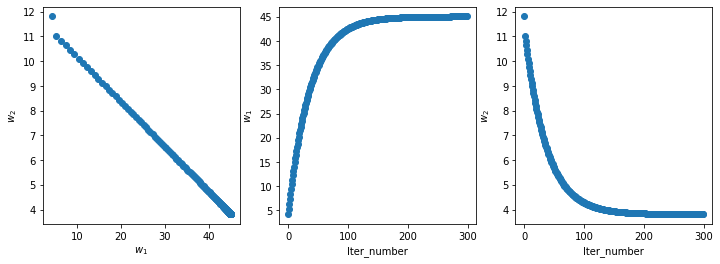

In [9]:
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(w_list[:, 0], w_list[:, 1])

plt.subplot(132)
plt.xlabel('Iter_number')
plt.ylabel(r'$w_1$')
plt.scatter(range(w_list.shape[0]), w_list[:, 0])

plt.subplot(133)
plt.xlabel('Iter_number')
plt.ylabel(r'$w_2$')
plt.scatter(range(w_list.shape[0]), w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

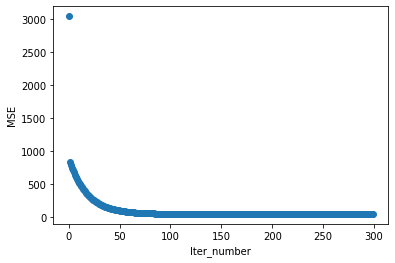

In [10]:
plt.scatter(range(len(errors)), errors)
plt.xlabel('Iter_number')
plt.ylabel('MSE')

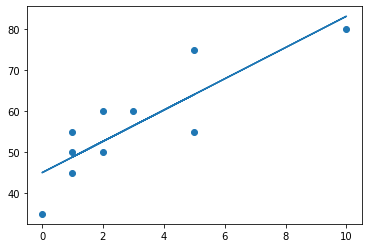

In [11]:
plt.plot(X[:,1], np.dot(X, W))
plt.scatter(X[:,1], y)
plt.show()

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [12]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    #W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot((y_pred - y), X))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [13]:
n = X.shape[0]

eta = 3e-2 
max_iter = 100000
i = 0
e = 1e-6
w_dist = 10000

w = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {w} \n')
while w_dist > e and i < max_iter:
# for i in range(n_iter):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    new_w = w - eta * (1/n * 2 * np.dot((y_pred - y), X))
    w_dist = np.linalg.norm(new_w - w, ord=2)
    
    w = new_w
    if i % 20 == 0:
        print(f'Iteration #{i}: w_new = {w}, MSE = {round(err,2)}')
        
    i += 1    

Number of objects = 10        
Learning rate = 0.03        
Initial weights = [1.  0.5] 

Iteration #0: w_new = [ 4.24 11.81], MSE = 3047.75
Iteration #20: w_new = [21.56325286  8.07372615], MSE = 318.89
Iteration #40: w_new = [31.56981205  6.25919093], MSE = 134.61
Iteration #60: w_new = [37.31533146  5.21732957], MSE = 73.85
Iteration #80: w_new = [40.61426696  4.61911848], MSE = 53.82
Iteration #100: w_new = [42.50843433  4.27564043], MSE = 47.22
Iteration #120: w_new = [43.59601851  4.07842381], MSE = 45.04
Iteration #140: w_new = [44.22048251  3.96518689], MSE = 44.32
Iteration #160: w_new = [44.57903433  3.90016905], MSE = 44.09
Iteration #180: w_new = [44.78490594  3.8628374 ], MSE = 44.01
Iteration #200: w_new = [44.90311234  3.84140249], MSE = 43.98
Iteration #220: w_new = [44.97098354  3.8290951 ], MSE = 43.97
Iteration #240: w_new = [45.00995351  3.8220285 ], MSE = 43.97
Iteration #260: w_new = [45.0323291   3.81797103], MSE = 43.97
Iteration #280: w_new = [45.04517661  3.81